## San Francisco Rental Property Market

Which San Francisco neighborhoods offer the best real estate investment opportunities for a "buy-and-rent" strategy?

In [343]:
# Required libraries and dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import widgets
import datapane as dp
from plotly.subplots import make_subplots
from pathlib import Path
from dotenv import load_dotenv

#### Data Aggregation

In [344]:
# Load the .env file into the notebook
load_dotenv()

# Reads in MAPBOX_API_KEY and sets your access token
mapbox_api_access_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_api_access_token)

# Reads in  DATAPANE API KEY and ses access token
datapane_access_token = os.getenv("DATAPANE_API_KEY")
dp.login(datapane_access_token)


Connected successfully to https://datapane.com as peterlieberman212@gmail.com


'peterlieberman212@gmail.com'

In [345]:
# Imports the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(Path("./data/sfo_neighborhoods_census_data.csv"), index_col="year")  
sfo_data_df.columns = ["Neighborhood", "Sale Price per SqFt", "Housing Units", "Gross Rent"]

In [346]:
statistics = sfo_data_df.describe().round(0)

In [347]:
sfo_data_df

,Neighborhood,Sale Price per SqFt,Housing Units,Gross Rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


---

#### Housing Units by Year

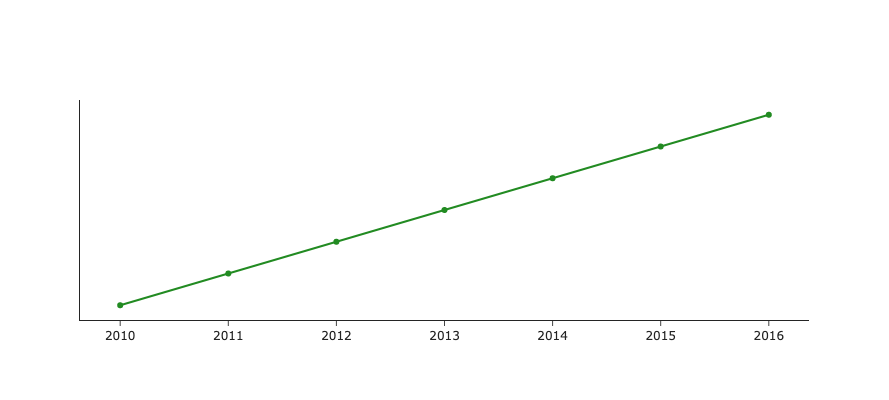

In [348]:
# Aggregates the data by year to display annual averages
data_by_year = sfo_data_df.groupby("year").mean()
data_by_year = data_by_year .round(0)

total_units_plot = go.Figure(go.Scatter(x=data_by_year.index, 
                                  y=data_by_year["Housing Units"], 
                                  name= "Number of Housing Units",
                                  line_color='forestgreen'))

total_units_plot.update_layout(template="simple_white")
total_units_plot.update_layout(width=800, height=400)
total_units_plot.update_layout(yaxis = dict(tickmode = 'array', tickvals = [200000, 400000, 600000]))

---

#### Sales vs Rental Market: SF Chart ####

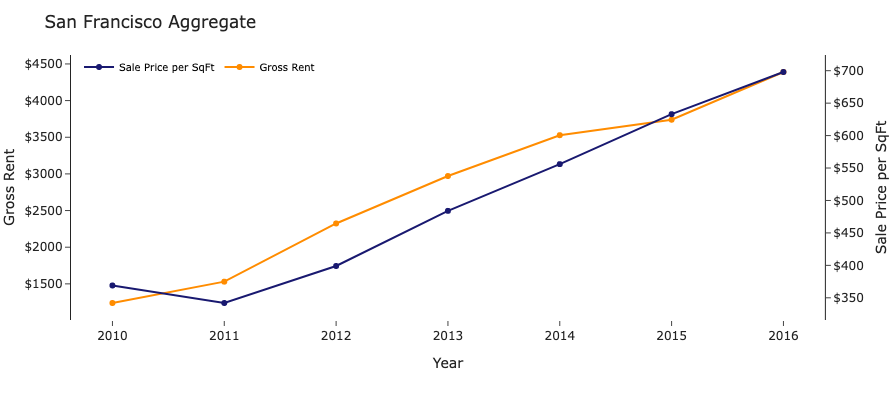

In [349]:
# Plots a comparison of sales and rental prices per square foot
annual_price_chart = make_subplots(specs=[[{"secondary_y" : True}]])

annual_price_chart.add_trace(go.Scatter(x=data_by_year.index, 
                                        y=data_by_year["Sale Price per SqFt"], 
                                        name= "Sale Price per SqFt", mode="lines+markers", 
                                        text = data_by_year["Sale Price per SqFt"],
                                        textposition="bottom right",
                                        line_color="midnightblue"), secondary_y=True)

annual_price_chart.add_trace(go.Scatter(x=data_by_year.index, 
                                        y=data_by_year["Gross Rent"], 
                                        name="Gross Rent", mode="lines+markers", 
                                        text = data_by_year["Gross Rent"],
                                        textposition="top left",
                                        line_color="darkorange"), secondary_y=False,)

annual_price_chart.update_xaxes(title_text = "Year", showline=False)
annual_price_chart.update_yaxes(title_text="Sale Price per SqFt", tickformat = '$', secondary_y=True)
annual_price_chart.update_yaxes(title_text="Gross Rent", tickformat = '$', secondary_y=False)
annual_price_chart.update_layout(template="simple_white")
annual_price_chart.update_layout(width=800, height=400)
annual_price_chart.update_traces(marker_colorscale="Earth", selector=dict(type='scatter'))
annual_price_chart.update_traces(fill="none")
annual_price_chart.update_layout(legend=dict(orientation="h", yanchor="bottom", y=.9, xanchor="left", x=.01, font = dict(size = 10, color = "black")))
annual_price_chart.update_layout(plot_bgcolor='white')
annual_price_chart.update_layout(margin=dict(l=0, r=0, t=55))
annual_price_chart.update_yaxes(nticks = 10)
annual_price_chart.update_layout(title = "San Francisco Aggregate")


---

#### Sales vs Rental Market: Neighborhood Chart with Dropdown Menu ####

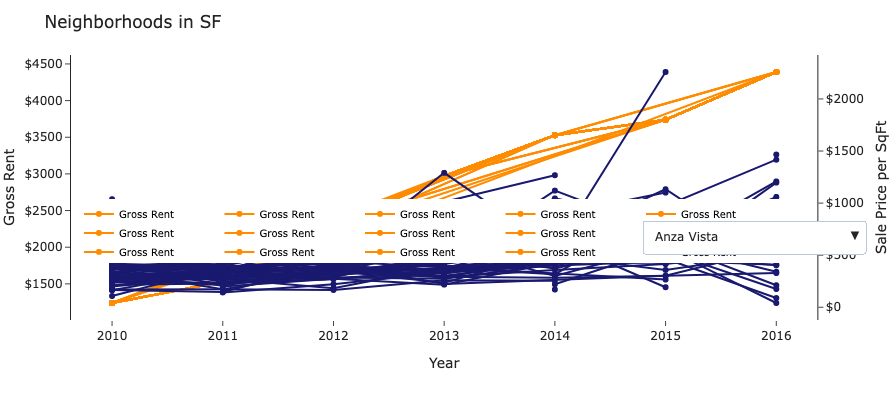

In [350]:
# Builds graph with two y axes
neighborhood_fig = make_subplots(specs=[[{"secondary_y" : True}]])

# List of neighborhoods for dropdown widget
neighborhood_list = sfo_data_df["Neighborhood"].unique().tolist()

# Builds primary y_axis for Gross Rent
for neighborhood in neighborhood_list:
    
    neighborhood_fig.add_trace(
        go.Scatter(
            x = sfo_data_df.index[sfo_data_df["Neighborhood"]==neighborhood],
            y = sfo_data_df['Gross Rent'][sfo_data_df["Neighborhood"]==neighborhood],
            name = "Gross Rent" , visible = True, line_color="darkorange"), secondary_y=False)

# Builds secondary y_axis for Price per SqFt
for neighborhood in neighborhood_list:
    
    neighborhood_fig.add_trace(
        go.Scatter(
            x = sfo_data_df.index[sfo_data_df["Neighborhood"]==neighborhood],
            y = sfo_data_df['Sale Price per SqFt'][sfo_data_df["Neighborhood"]==neighborhood],
            name = 'Sale Price per SqFt', visible = True,  line_color="midnightblue"), secondary_y=True)
    
# Creates widget    
buttons = []
for i, neighborhood in enumerate(neighborhood_list):
    args = [False] * len(neighborhood_list)
    args[i] = True
    
    button = dict(label = neighborhood,
                  method = "update",
                  args=[{"visible": args}])
    
    buttons.append(button)

# Adds widget to chart
neighborhood_fig.update_layout(
    updatemenus=[dict(
                    active=1,
                    type="dropdown",
                    buttons=buttons,
                    x = 1,
                    y = 1.06,
                    xanchor = 'right',
                    yanchor = 'bottom'
                )], 
    autosize=False,
    width=1000,
    height=800
)

# Styles chart
neighborhood_fig.update_xaxes(title_text = "Year", showline=False)
neighborhood_fig.update_yaxes(title_text="Sale Price per SqFt", tickformat = '$', secondary_y=True)
neighborhood_fig.update_yaxes(title_text="Gross Rent", tickformat = '$', secondary_y=False)
neighborhood_fig.update_layout(template="simple_white")
neighborhood_fig.update_layout(width=800, height=400)
neighborhood_fig.update_traces(marker_colorscale="Earth", selector=dict(type='scatter'))
neighborhood_fig.update_traces(fill="none")
neighborhood_fig.update_layout(plot_bgcolor='white')
neighborhood_fig.update_layout(margin=dict(l=0, r=0, t=55))
neighborhood_fig.update_yaxes(nticks = 10)
neighborhood_fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=.9, xanchor="left", x=.01, font = dict(size = 10, color = "black")))
neighborhood_fig.update_layout(title = "Neighborhoods in SF")

---

#### Inteactive Neighbordhood Map ####

In [351]:
# Loads neighborhood coordinates
neighborhood_locations_df = pd.read_csv(
    Path("data/neighborhoods_coordinates.csv"),
    index_col="Neighborhood")

# Build new DataFrame with coordinates and price data by neighborhood
all_neighborhood_info_df = sfo_data_df.groupby(by="Neighborhood").mean()
all_neighborhoods_df = pd.concat([neighborhood_locations_df, all_neighborhood_info_df], axis="columns", sort=False)
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Creates a scatter mapbox to analyze neighborhood info
sf_map = px.scatter_mapbox(
    all_neighborhoods_df,
    lat="Lat",
    lon="Lon",
    size="Sale Price per SqFt",
    color="Gross Rent",
    hover_name = "Neighborhood",
    zoom=12, height=800,
    hover_data = ["Sale Price per SqFt", "Gross Rent", "Housing Units"],
    mapbox_style = "light",
    color_discrete_sequence =["blugrn"],
    title="Heatmap of Prices in SF Neighborhoods")

#### Datapane Integration ####

In [352]:
sfo_data_df.reset_index(inplace=True)

In [353]:
sf_housing_analysis = dp.Report(
    dp.Media(file="./images/sf.jpeg"),
    dp.Plot(sf_map, name ="map"),
    dp.Select(blocks=[
        dp.Table(statistics, label = "Statistics"),
        dp.Table(data_by_year, label = "Data Summary"),
        dp.DataTable(sfo_data_df, label = "Whole Dataset")]),
    dp.Plot(annual_price_chart, name="prices_city"),
    dp.Plot(neighborhood_fig, name="prices_neighborhoods"))

sf_housing_analysis.upload(name='San Francisco Housing Analysis', 
                           formatting=dp.ReportFormatting(
                            width=dp.ReportWidth.MEDIUM,
                           accent_color="orange", 
                           bg_color="White",
                           light_prose=False), 
                           open=True)

Uploading report and associated data - *please wait...*

Report successfully uploaded. View and share your report <a href='https://datapane.com/reports/63OXrW7/san-francisco-housing-analysis/' target='_blank'>here</a>, or edit your report <a href='https://datapane.com/reports/63OXrW7/san-francisco-housing-analysis/edit/' target='_blank'>here</a>.

In [354]:
sfo_data_df

,year,Neighborhood,Sale Price per SqFt,Housing Units,Gross Rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
